In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Objective: Modelling of the inurance dataset to predict the insurance charges such that other features of the dataset are provided.**
> Performing preprocessing on the dataset to have clean and efficient data.

> EDA to analyse the data, get insights from the data for further processing.

> Feature engineering of the data.

> Modelling the dataset, to predict the charges.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams['font.size'] = 10
plt.style.use('seaborn-whitegrid')


def read_file():
  '''
  Returns pandas dataframe.

      Returns:
        dataset: Pandas dataframe of insurance.csv file
  '''

  data_folder = Path('/content/drive/MyDrive/Datasets_learning_kaggle/')
  file_to_open = data_folder / 'insurance.csv'
  if Path(file_to_open).is_file():
    dataset = pd.read_csv(file_to_open)
  else:
    raise ValueError('Error while reading the file')

  return dataset

In [ ]:
insurance_dataset = read_file()
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Information from the dataset.
> There are in total 7 columns in the dataset.

> Age, bmi, children and charges are numerical variables.

> Sex, Smoker, region are categorical variables.

> The statistics of variables are quite different from each other.

> All dataset consists of same number of values.

> Here our independent features are age, sex, bmi, childre, smoker and region.

> The dependent feature is charges.

**Checking for missing values in the dataset**

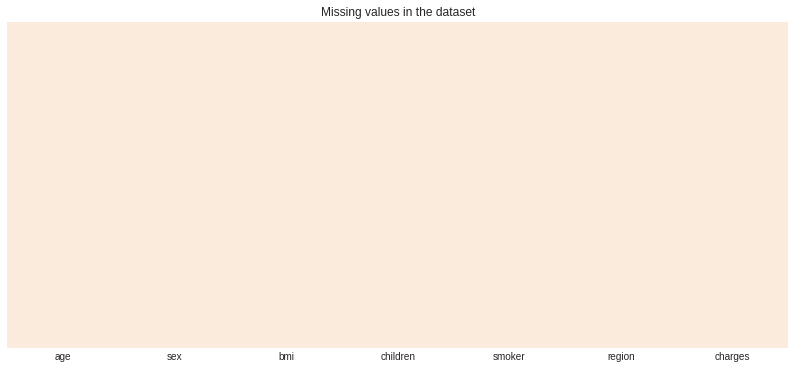

In [ ]:
def visualize_missing_value(insurance_dataset):
  '''
  Plots heatmap to visualize the missing values
      
      Parameter:
          insurance_dataset (dataframe): A pandas dataframe
  '''
  sns.heatmap(insurance_dataset.isnull(), cbar = False, cmap = 'rocket_r', yticklabels = False)
  plt.title('Missing values in the dataset')

  return None

visualize_missing_value(insurance_dataset)


> There is no missing value in the dataset.

**Seeing the correlation between the variables in the dataset.**

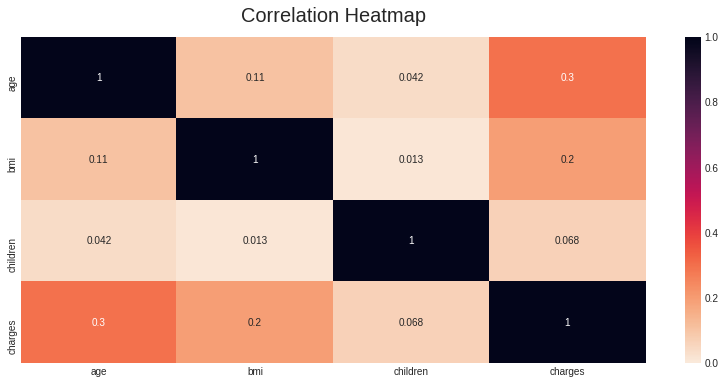

In [ ]:
def visualize_correlation(insurance_dataset):
  '''
  Plots heatmap to visualize the correlation between the different features.
      
    Parameter:
        insurance_dataset (dataframe): A pandas dataframe
  '''

  heatmap = sns.heatmap(insurance_dataset.corr(), vmin=0, vmax=1, annot=True, cmap='rocket_r')
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)

  return None

def visualize_individual_correlation(insurance_dataset):
  '''
  Plots heatmap to visualize the correlation between the different features and the target variable.
      
    Parameter:
        insurance_dataset (dataframe): A pandas dataframe
  '''
  heatmap = sns.heatmap(insurance_dataset.corr()[['charges']].sort_values(by='charges', ascending = False),
            vmin = 0, vmax = 1, annot = True, cmap = 'rocket_r')
  heatmap.set_title('Features correlating with charges', fontdict={'fontsize' : 18}, pad = 16)

  return None

visualize_correlation(insurance_dataset)


> For strong correlation the values should be closer to 1 or -1, In above illustration all the values for correlation is less than 0.5, So all the variables add certain context to do the further regression. Due to this reason we will not eliminate any features present in the dataset. 

>For further visualizing the correlation of the features with the target variable below plot is plotted.

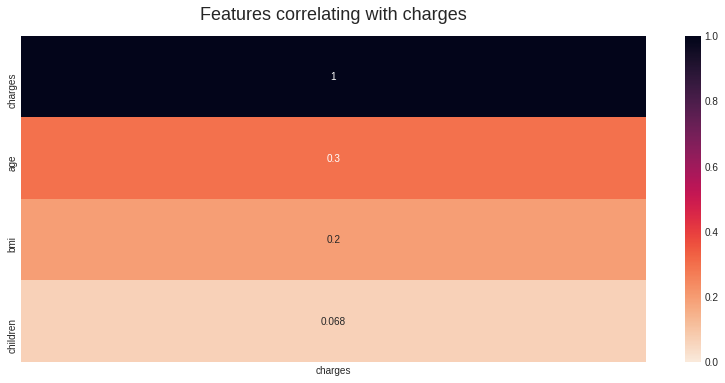

In [ ]:
visualize_individual_correlation(insurance_dataset)

**Visualizing the relationship of age with charges.** 
> Hypothesis: With age health issues increases and so does the insurance charge.

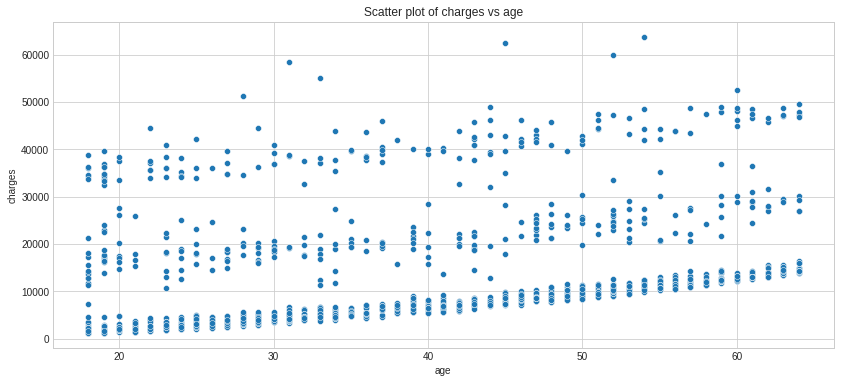

In [ ]:
def scatterplot_charges_vs_age(insurance_dataset):
  '''
  Plots scatterplot to visualize the relationship of age with charges
      
    Parameter:
        insurance_dataset (dataframe): A pandas dataframe
  '''
  charges_vs_age = sns.scatterplot(x=insurance_dataset['age'], y='charges', data=insurance_dataset, palette='rocket_r')
  charges_vs_age.set_title('Scatter plot of charges vs age')

  return None

scatterplot_charges_vs_age(insurance_dataset)


Findings:
> With age there is continous increase in insurance charges in some of the cases, but there are a lots of values that are highly fluctuating even in the same age.

> To further understand the reason behind the fluctuation, considering other features as well.


1. Visualizing charges with age where color indicates the sex.

2. Visualizing charges with age where color indicates whether they are smoke or not.


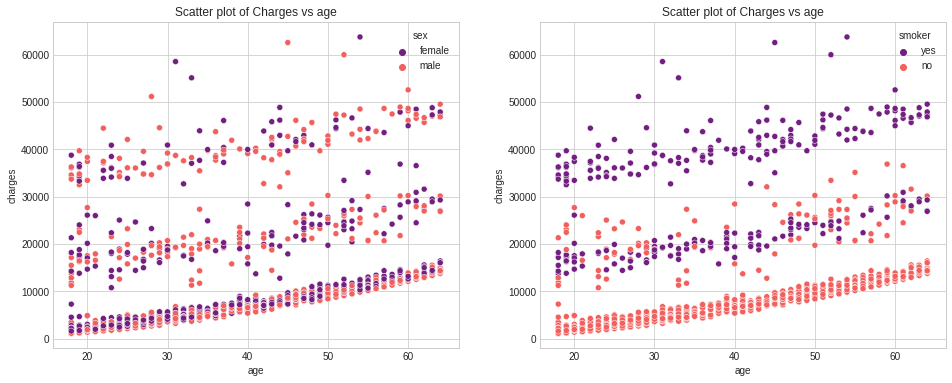

In [ ]:
def further_evaluation(insurance_dataset):

  f = plt.figure(figsize=(16,6))
  ax = f.add_subplot(121)
  sns.scatterplot(x=insurance_dataset['age'],y=insurance_dataset['charges'],data=insurance_dataset,palette='magma',hue=insurance_dataset['sex'],ax=ax)
  ax.set_title('Scatter plot of Charges vs age')

  ax = f.add_subplot(122)
  sns.scatterplot(x=insurance_dataset['age'],y=insurance_dataset['charges'],data=insurance_dataset,palette='magma',hue=insurance_dataset['smoker'],ax=ax) 
  ax.set_title('Scatter plot of Charges vs age')

  return None

further_evaluation(insurance_dataset)

> Sex seems not to be the main reason behind the high values for same age. 

> **Wether the person is smoker or not seems to be the reason behind the high values for the same age.**

> Further seeing the the bmi vs charges coloring smokers and non-smokers differently.



Text(0.5, 1.0, 'Scatter plot of charges vs bmi')

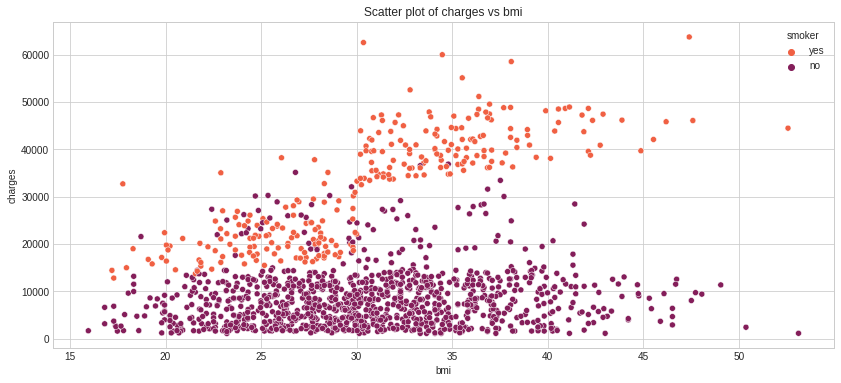

In [ ]:
charges_vs_bmi = sns.scatterplot(x=insurance_dataset['bmi'], y='charges', hue = 'smoker', data=insurance_dataset, palette='rocket_r')
charges_vs_bmi.set_title('Scatter plot of charges vs bmi')

As smoking seems to be a very important feature that determines the high and low range of insurance charges.
> **Visualizing the IQR ranges, median and outliers of smokers and non-smokers**


Text(0.5, 1.0, 'Box plot of charges vs smokers with color indicating sex.')

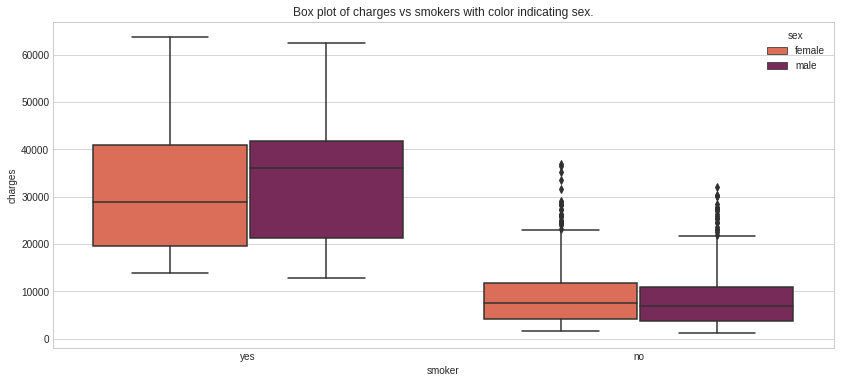

In [ ]:
box = sns.boxplot(x=insurance_dataset['smoker'], y='charges', hue='sex', data=insurance_dataset, palette='rocket_r')
box.set_title('Box plot of charges vs smokers with color indicating sex.')

> **Above plot clearly illustrates that the smokers has a higher range of insurance charges whereas non-smokers has a lower range of insurance charges.**

**Visualizing the distribution of the target variable.**

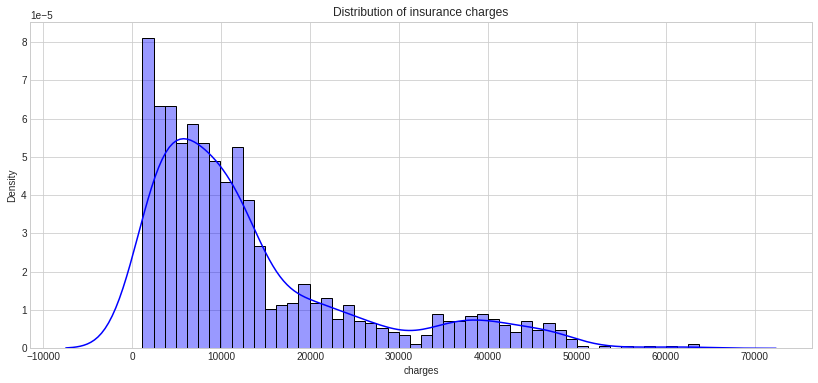

In [ ]:
def distribution_target_variable(insurance_dataset):
  '''
  Plots histogram to visualize the distribution of target variable, i.e. insurance charges
      
    Parameter:
        insurance_dataset (dataframe): A pandas dataframe
  '''

  target_distribution = sns.histplot(data=insurance_dataset['charges'], bins=50, stat="density",  color = 'b', alpha=0.4, kde=True, kde_kws={"cut": 3})
  target_distribution.set_title('Distribution of insurance charges')

  return None
  
distribution_target_variable(insurance_dataset)

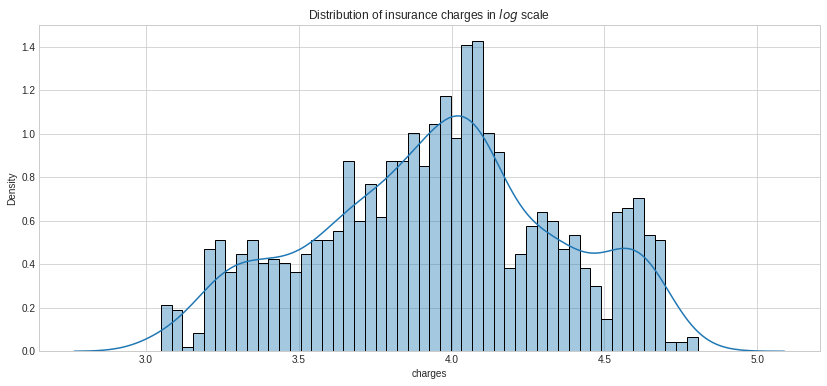

In [ ]:
def distribution_log_target_variable(insurance_dataset):
  '''
  Plots histogram to visualize the distribution of log of target variable, i.e. insurance charges
      
    Parameter:
        insurance_dataset (dataframe): A pandas dataframe
  '''
  target_log = sns.histplot(data=np.log10(insurance_dataset['charges']), bins=50, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  target_log.set_title('Distribution of insurance charges in $log$ scale')
  # ax.set_xscale('log')

  return None

distribution_log_target_variable(insurance_dataset)

The log transformation of data resulted to the normal distribution of the data.
> **This makes the statistical analysis from the data more valid.**

The log transformation reduces or removes the skewness of our original data. When our original continous data do not follow the bell curve, we can log transform this data to make it as "normal" as possible so that the statistical analysis results becomes more valid.

**Visualizing the outliers in the dataset.**

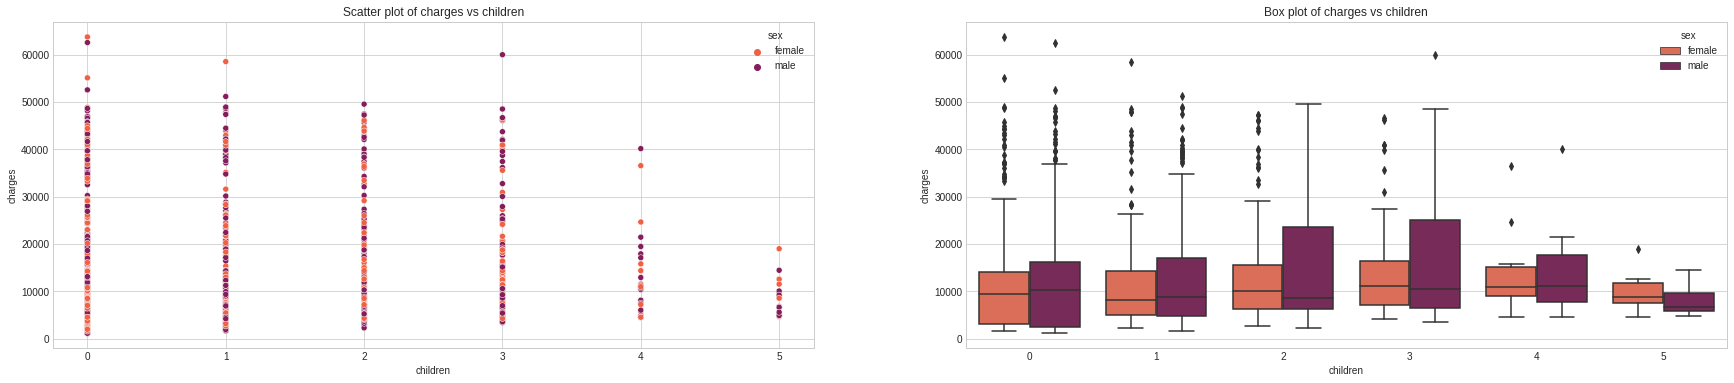

In [ ]:
def visualize_outliers_children(insurance_dataset):
  f = plt.figure(figsize = (30, 6))

  ax = f.add_subplot(121)
  sns.scatterplot(x=insurance_dataset['children'], y='charges', hue = 'sex', data=insurance_dataset, palette='rocket_r')
  ax.set_title('Scatter plot of charges vs children')

  ax = f.add_subplot(122)
  sns.boxplot(x=insurance_dataset['children'], y='charges', hue='sex', data=insurance_dataset, palette='rocket_r')
  ax.set_title('Box plot of charges vs children')

visualize_outliers_children(insurance_dataset)

NameError: ignored

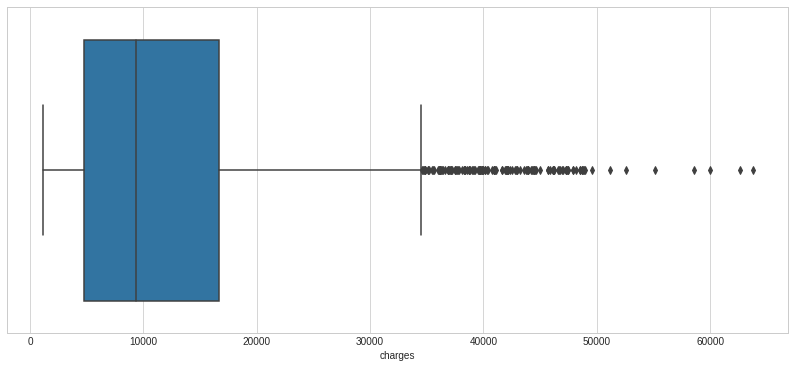

In [ ]:
  sns.boxplot(x=insurance_dataset['charges'], data=insurance_dataset)
  ax.set_title('Box plot of charges')

####**Feature Engineering**




#####**Conversion of categorical variables to numerical variables**

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
1. Label Encoding
2. One hot encoding
3. Dummy variable trap

> **Label Encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

> A **One hot encoding** is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expressive. This first requires that the categorical values to be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the interger, which is marked with a one.

> The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple trm one variable can be predicted from the others

In [ ]:
def categorical_to_numerical(insurance_dataset):
  '''

  '''
  categorical_columns = ['sex', 'children', 'smoker', 'region']
  df_encode = pd.get_dummies(data = insurance_dataset, prefix = "OHE", prefix_sep = "_", columns = categorical_columns,
                           drop_first = True,
                           dtype = 'int8')
  return df_encode

print('Columns in original data frame:\n',insurance_dataset.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_dataset.shape)
dataset_encoded = categorical_to_numerical(insurance_dataset)
print('\n------------------------------------------------------------------------')
print('\nColumns in data frame after encoding dummy variable:\n',dataset_encoded.columns.values)
print('\nNumber of rows and columns in the dataset:',dataset_encoded.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

------------------------------------------------------------------------

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


> The original categorical variable are removed and also one hot encode of variable for 4 coloumns are droped (dummy variable trap). So all three encoding step is completed by using get dummies function.

**Applying log transform to target value i.e the charge column**

> EDA showed transformation to normal distribution of charge after doing log transform.

In [ ]:
def log_transform(dataset_encoded):

  dataset_encoded['charges'] = np.log(dataset_encoded['charges'])

  return dataset_encoded

In [ ]:
final_dataframe = log_transform(dataset_encoded)
final_dataframe.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


In [ ]:
def test_train_split(final_dataframe):
  
  X = final_dataframe.drop('charges', axis = 1)
  y = final_dataframe['charges']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =23 )
  train_test_dataset = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
  
  return train_test_dataset

def linear_regression(train_test_dataset):

  lin_reg = LinearRegression()
  lin_reg.fit(train_test_dataset['X_train'], train_test_dataset['y_train'])
  y_pred = lin_reg.predict(train_test_dataset['X_test'])
  mse= mean_squared_error(y_pred, train_test_dataset['y_test'])
  R_square = lin_reg.score(train_test_dataset['X_test'], train_test_dataset['y_test'])

  return y_pred, mse, R_square

def polynomial_regression(train_test_dataset):

  X_train_poly = PolynomialFeatures(degree=2).fit_transform(train_test_dataset['X_train'])
  poly_reg = LinearRegression()
  X_test_poly = PolynomialFeatures(degree=2).fit_transform(train_test_dataset['X_test'])
  poly_reg.fit(X_train_poly, train_test_dataset['y_train'])
  y_pred_poly = poly_reg.predict(X_test_poly)
  mse_poly = mean_squared_error(y_pred_poly, train_test_dataset['y_test'])
  R_square_poly = poly_reg.score(X_test_poly,train_test_dataset['y_test'])

  return y_pred_poly, mse_poly, R_square_poly

train_test_dataset = test_train_split(final_dataframe)
y_pred, mse, R_square = linear_regression(train_test_dataset)
y_pred_poly, mse_poly, R_square_poly = polynomial_regression (train_test_dataset)

In [ ]:
print("Mean Square Error obtained in linear regression model is: {}".format(mse))
print("\nR Square  obtained in linear regression model is: {}".format(R_square))
print('\n-------------------------------------------------------------------------\n')
print("Mean Square Error obtained in Polynomial regression model is: {}".format(mse_poly))
print("\nR Square  obtained in Polynomial regression model is: {}".format(R_square_poly))

Mean Square Error obtained in linear regression model is: 0.18729622322981887

R Square  obtained in linear regression model is: 0.7795687545055318

-------------------------------------------------------------------------

Mean Square Error obtained in Polynomial regression model is: 0.12727884942568196

R Square  obtained in Polynomial regression model is: 0.8502039452788114


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value (Polynomial Regression)')

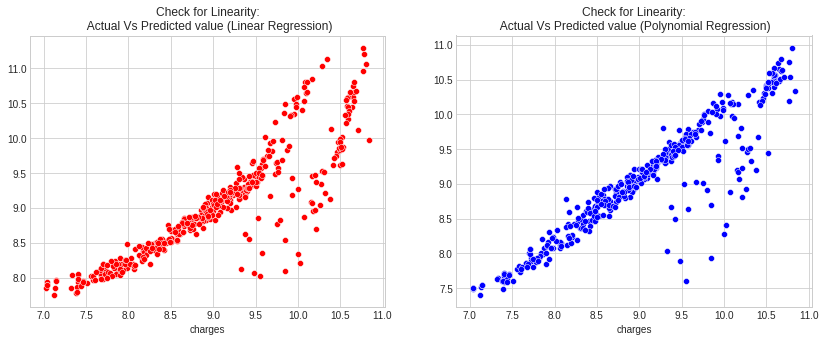

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(train_test_dataset['y_test'], y_pred, ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value (Linear Regression)')

ax = f.add_subplot(122)
sns.scatterplot(train_test_dataset['y_test'], y_pred_poly, ax=ax, color='b')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value (Polynomial Regression)')

> In linear regression model the actual vs predicted plot is curve so linear assumption seems incorrect while in the other hand using polynomial regression generates a more linear curve with less MSE and more R_square value. In between linear and polynomial regression, for this dataset, polynomial regression seems to be a better choice.
